## Import & Setting

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import config
import os
import utils
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RANSACRegressor

data = config.config()

## Functions

In [2]:
def cal_error_regression(depth_name_list, df_regression):
    reg_depth_error, reg_depth_error_rate, reg_depth_error_rate_avg, reg_depth = utils.melt_to_col(depth_name_list,
                                                                                                   df_regression)
    reg_depth_diff = utils.create_dataframe(reg_depth_error, depth_name_list)
    reg_depth_reg = utils.create_dataframe(reg_depth, depth_name_list)
    df_depth_reg_error_rate = utils.df_to_error_rate_list(reg_depth_reg)
    return reg_depth_diff, df_depth_reg_error_rate

In [3]:
def set_regression(depth_list, depth_name_list, degree=2):
    df_depth_reggresion = pd.DataFrame(depth_list, depth_name_list).T.melt().dropna(axis=0)
    df_feature, poly_leg = utils.poly_feature(df_depth_reggresion['value'].values.reshape(-1, 1), degree)
    lin_reg_2 = LinearRegression()
    # lin_reg_2 = Ridge()
    lin_reg_2.fit(df_feature, df_depth_reggresion['variable'].values)
    utils.write_coef(data.file_manager.save_path, np.array(lin_reg_2.coef_), degree)
    # lin_reg_2 = RANSACRegressor(random_state=0).fit(df_feature, df_depth_reggresion['variable'].values)
    predict_Y = lin_reg_2.predict(poly_leg.fit_transform(df_depth_reggresion['value'].values.reshape(-1, 1)))
    df_depth_reggresion['regression'] = lin_reg_2.predict(
        poly_leg.fit_transform(df_depth_reggresion['value'].values.reshape(-1, 1)))
    return df_depth_reggresion

In [4]:
def boxplot(df_diff, df_rate):
    df_mean = df_diff.T.mean()
    ax = df_diff.T.plot(kind='box')
    ax.plot(ax.get_xticks(), df_mean, color='orange', linewidth=0.5, marker='o', markersize=0.8)
    # for i in range(len(df_rate)):
    #     ax.text(ax.get_xticks()[i]-0.15, -1.5, "{}%".format(round(df_rate[i], 2)), fontsize=7.5, color='red')
    plt.xlabel('depth(m)')
    plt.ylabel('error(m)')
    plt.grid(True)
    plt.title('average error rate : {}%'.format(round(float(sum(df_rate) / len(df_rate)), 2)))
    plt.show()

## Set variable (Road)

In [5]:
category = 'road'

## Read gt_distance

In [6]:
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category))
data.file_manager.path_category_update(category)

gt_dist = data.distance.read_gt_distance(utils.read_folder_list(data.file_manager.img_path),
                                         data.file_manager.gt_distance_path)
folder_names = gt_dist.keys()
scale = data.file_manager.scale_num
degree = data.file_manager.degree_num

## Load depth list

In [7]:
depth_list, bottom_depth_list, depth_name_list, depth_diff, box_coord = utils.load_depth_list(
    data.file_manager.save_path,
    gt_dist, folder_names,
    scale)

## Plot - original

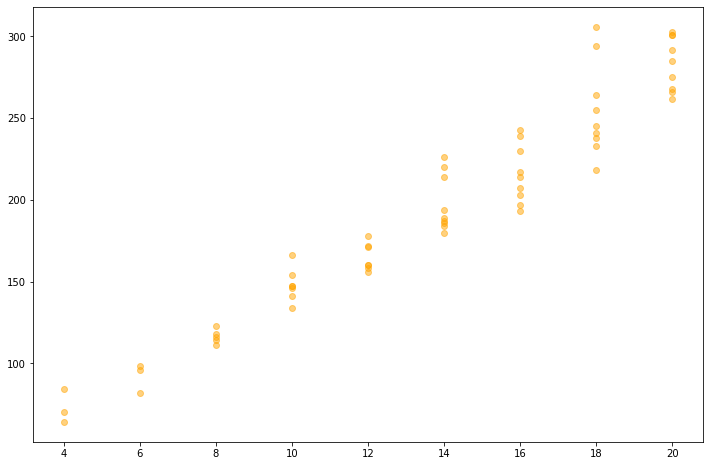

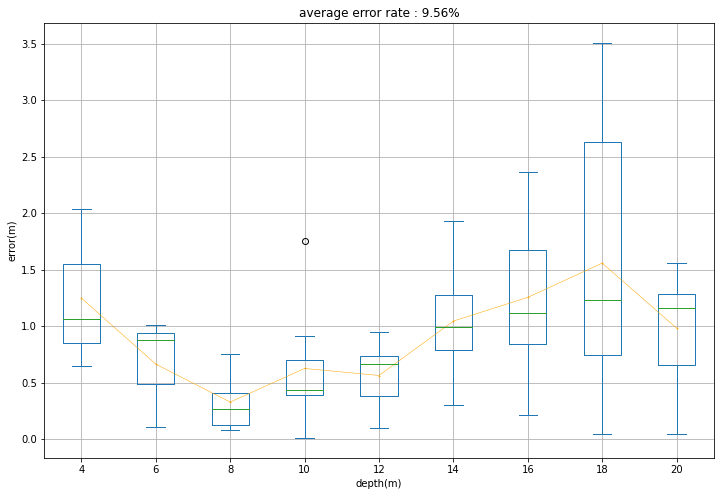

In [141]:
df_depth_regression = set_regression(depth_list, depth_name_list, degree=degree)
df_reg_diff_ori, df_error_rate_ori = cal_error_regression(depth_name_list, df_depth_regression)
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=0.5)
boxplot(df_reg_diff_ori, df_error_rate_ori)
df_depth_regression.to_csv(
    data.file_manager.regression_data + os.path.join('/', category) +
    os.path.join('/', 'regression_original_{}.csv'.format(degree)))
plt.show()

## Plot - mode

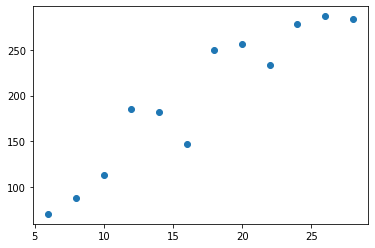

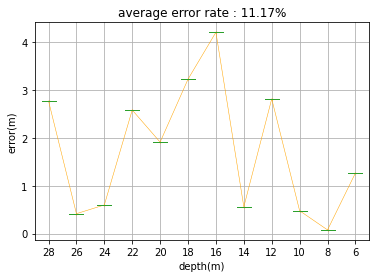

In [9]:
    df_depth_mode_list = utils.df_option_to_list(utils.create_dataframe(depth_list, depth_name_list))
    df_depth_mode_regression = set_regression(df_depth_mode_list, depth_name_list)
    df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_mode_regression)
    plt.scatter(df_depth_mode_regression['variable'].values, df_depth_mode_regression['value'].values)
    df_depth_mode_regression.to_csv(
        data.file_manager.regression_data + os.path.join('/', category) +
        os.path.join('/', 'regression_mode_{}.csv'.format(degree)))
    boxplot(df_reg_diff_mode, df_error_rate_mode)

## Plot - bottom line

In [140]:
    df_depth_bottom_list = utils.df_option_to_list(utils.create_dataframe(bottom_depth_list, depth_name_list))
    df_depth_bottom_regression = set_regression(bottom_depth_list, depth_name_list)
    df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_bottom_regression)
    plt.scatter(df_depth_bottom_regression['variable'].values, df_depth_bottom_regression['value'].values)
    df_depth_bottom_regression.to_csv(
        data.file_manager.regression_data + os.path.join('/', category) +
        os.path.join('/', 'regression_bottom_line_{}.csv'.format(degree)))
    boxplot(df_reg_diff_mode, df_error_rate_mode)

IndexError: index 0 is out of bounds for axis 0 with size 0

## Plot - options

In [139]:
    df_depth_mode_list = utils.df_option_to_list(utils.create_dataframe(bottom_depth_list, depth_name_list))
    df_depth_avg_list = utils.df_option_to_list(utils.create_dataframe(bottom_depth_list, depth_name_list), 'avg')
    df_depth_median_list = utils.df_option_to_list(utils.create_dataframe(bottom_depth_list, depth_name_list), 'median')
    df_depth_mode_regression = set_regression(df_depth_mode_list, depth_name_list, degree=degree)
    df_depth_avg_regression = set_regression(df_depth_avg_list, depth_name_list, degree=degree)
    df_depth_median_regression = set_regression(df_depth_median_list, depth_name_list, degree=degree)
    plt.scatter(df_depth_bottom_regression['variable'].values, df_depth_bottom_regression['value'].values, c="orange",
                alpha=0.5)
    plt.plot(df_depth_mode_regression['variable'].values, df_depth_mode_regression['value'].values, 'o',
             linestyle='dashed', linewidth=2, markersize=6, alpha=.8)
    plt.plot(df_depth_avg_regression['variable'].values, df_depth_avg_regression['value'].values, 'o',
             linestyle='dashed', linewidth=2, markersize=6, alpha=.8, c="red")
    plt.plot(df_depth_median_regression['variable'].values, df_depth_median_regression['value'].values, 'o',
             linestyle='dashed', linewidth=2, markersize=6, alpha=.8, c="green")
    plt.legend(['mode', 'avg', 'median'])
    plt.grid(True)
    plt.xticks(depth_name_list)
    plt.xlabel('depth(m)')
    plt.ylabel('value')
    plt.show()
    df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_mode_regression)
    df_reg_diff_avg, df_error_rate_avg = cal_error_regression(depth_name_list, df_depth_avg_regression)
    df_reg_diff_median, df_error_rate_median = cal_error_regression(depth_name_list, df_depth_median_regression)
    boxplot(df_reg_diff_mode, df_error_rate_mode)
    boxplot(df_reg_diff_avg, df_error_rate_avg)
    boxplot(df_reg_diff_median, df_error_rate_median)

IndexError: index 0 is out of bounds for axis 0 with size 0

*****

# Plot - *ground*

## Initialize *ground* configuration

In [252]:
data = config.config()

## Set variable (*ground*)

In [253]:
category = 'ground'
direction_e = 'east'
direction_w = 'west'
direction_n = 'north'
direction_s = 'south'

## *ground* path check

In [221]:
# East
data.file_manager.path_category_update(category, direction_e)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_e)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_e))

In [206]:
# West
data.file_manager.path_category_update(category, direction_w)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_w)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_w))

In [241]:
# North
data.file_manager.path_category_update(category, direction_n)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_n)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_n))

In [254]:
# South
data.file_manager.path_category_update(category, direction_s)
if not utils.check_exist(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_s)):
    utils.make_folder(data.file_manager.regression_data + os.path.join('/', category) + os.path.join('/', direction_s))

## Read *gt_distance*

In [255]:
gt_dist = data.distance.read_gt_distance(utils.read_folder_list(data.file_manager.img_path),
                                         data.file_manager.gt_distance_path)
folder_names = gt_dist.keys()
scale = data.file_manager.scale_num
degree = data.file_manager.degree_num
depth_list, bottom_depth_list, depth_name_list, depth_diff, box_coord = utils.load_depth_list(
    data.file_manager.save_path,
    gt_dist, folder_names,
    scale,
    ground=True)

0004
73 191 
327 191 
581 190 
0006
150 180 
326 178 
503 175 
0008
64 159 
188 159 
324 158 
460 156 
584 155 
0010
19 149 
111 147 
215 147 
324 146 
433 145 
536 144 
633 143 
0012
63 141 
143 140 
231 138 
323 137 
417 138 
504 134 
587 135 
0014
34 135 
96 135 
169 135 
246 134 
325 134 
403 133 
478 132 
553 131 
619 131 
0016
65 131 
123 130 
185 129 
254 130 
324 129 
392 129 
461 129 
527 128 
586 127 
0018
92 127 
143 127 
200 127 
263 127 
324 126 
385 125 
446 125 
505 125 
559 125 
0020
113 124 
162 124 
213 124 
268 123 
324 123 
379 122 
433 122 
487 121 
535 123 


## Plot - *east*

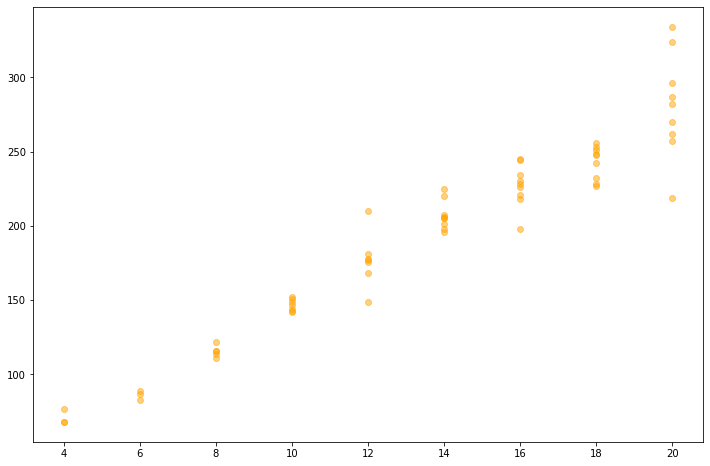

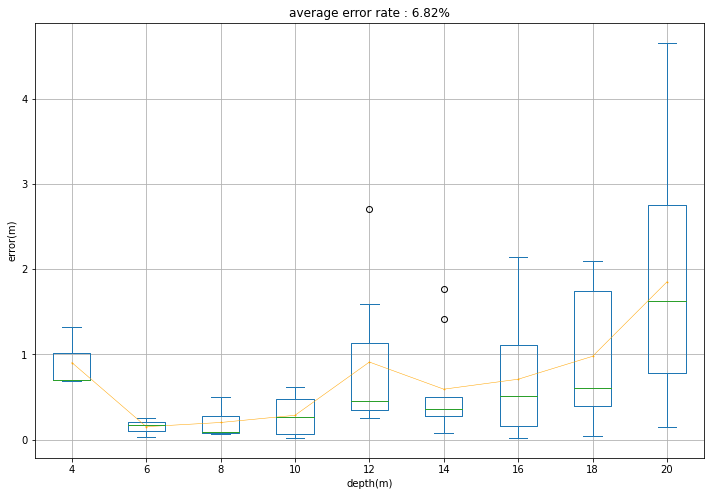

In [256]:
df_depth_regression = set_regression(depth_list, depth_name_list, degree=degree)
df_reg_diff_ori, df_error_rate_ori = cal_error_regression(depth_name_list, df_depth_regression)
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=0.5)
boxplot(df_reg_diff_ori, df_error_rate_ori)
df_depth_regression.to_csv(
    data.file_manager.regression_data + os.path.join('/', category) +
    os.path.join('/', 'regression_original_{}.csv'.format(degree)))
plt.show()

## Plot - *east*

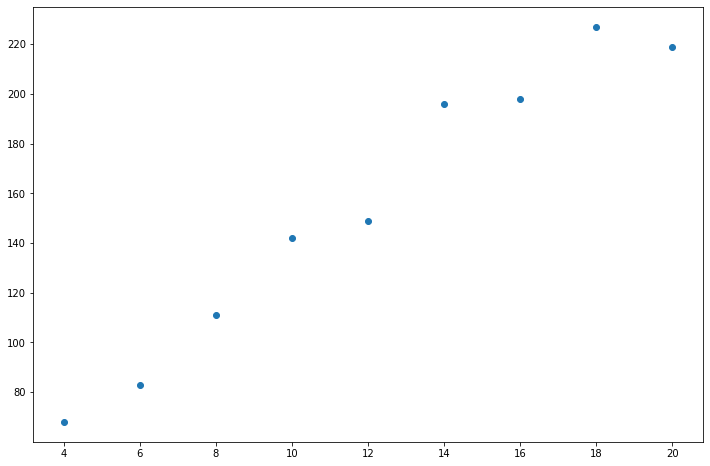

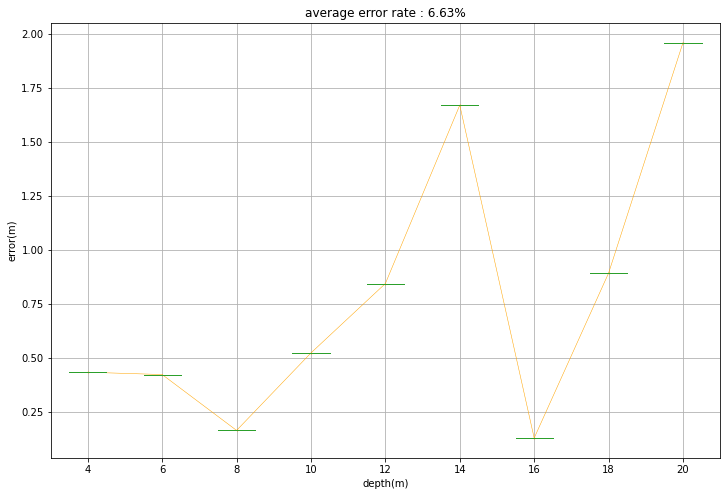

[10.830408366517474,
 7.041037136455201,
 2.049097933642785,
 5.226334523563274,
 7.030557137868569,
 11.923804328488139,
 0.8041035103017125,
 4.955246784771243,
 9.792066665964736]

In [432]:
df_depth_mode_list = utils.df_option_to_list(utils.create_dataframe(depth_list, depth_name_list))
df_depth_mode_regression = set_regression(df_depth_mode_list, depth_name_list)
df_reg_diff_mode, df_error_rate_mode = cal_error_regression(depth_name_list, df_depth_mode_regression)
plt.scatter(df_depth_mode_regression['variable'].values, df_depth_mode_regression['value'].values)
df_depth_mode_regression.to_csv(
    data.file_manager.regression_data + os.path.join('/', category) +
    os.path.join('/', 'regression_mode_{}.csv'.format(degree)))
boxplot(df_reg_diff_mode, df_error_rate_mode)


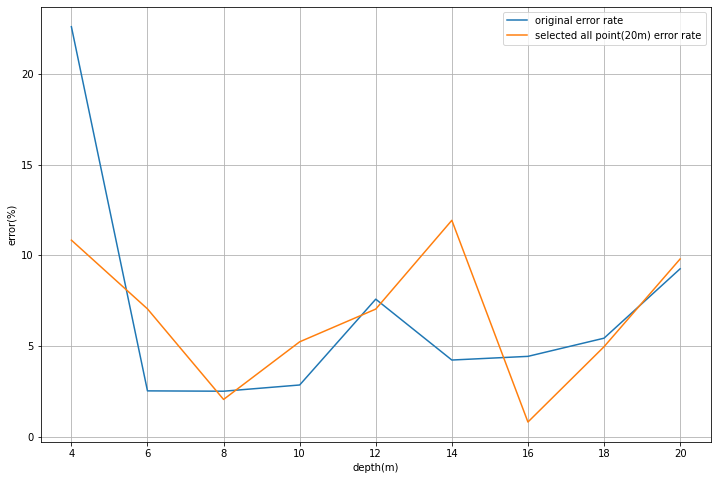

In [448]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(depth_name_list, df_error_rate_ori)
plt.plot(depth_name_list, df_error_rate_mode)
plt.legend(['original error rate', 'selected all point(20m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)

## Plot selected distance (0020) ->*20m*

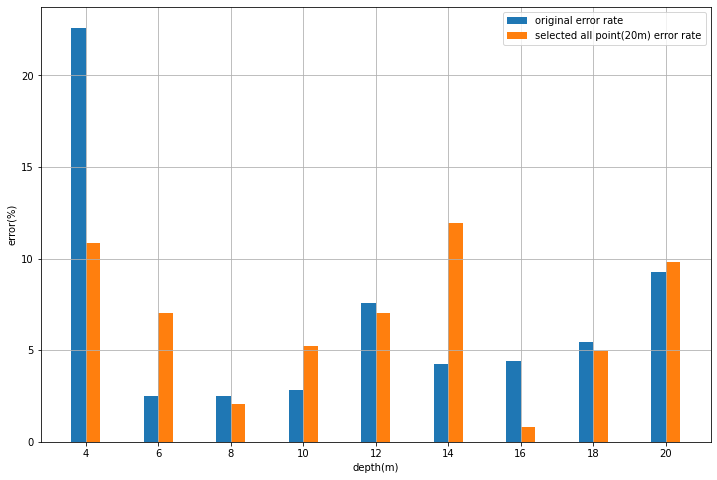

In [471]:
df_error_rate_mode
x = np.arange(9)
plt.bar(x-0.1, df_error_rate_ori, width=0.2)
plt.bar(x+0.1, df_error_rate_mode, alpha=1, width=0.2)
plt.xticks(x, depth_name_list)
plt.legend(['original error rate', 'selected all point(20m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)

In [258]:
folder_names_list = list(folder_names)
selected_dist = folder_names_list[-1] # 0020 -> 20m
data.file_manager.depth_file = utils.rand_img(data.file_manager.depth_path + os.path.join('/', selected_dist))
selected_dist_path = data.file_manager.depth_path + os.path.join('/', selected_dist, data.file_manager.depth_file)
selected_depth_list = utils.coord_to_depth(selected_dist_path, box_coord)

In [259]:
# df original depth
df_depth_regression = set_regression(depth_list, depth_name_list, degree=degree)
df_reg_diff_ori, df_error_rate_ori = cal_error_regression(depth_name_list, df_depth_regression)
# df selected depth
df_selected_depth_regression = set_regression(selected_depth_list, depth_name_list, degree=degree)
df_selected_reg_diff_ori, df_selected_error_rate_ori = cal_error_regression(depth_name_list, df_selected_depth_regression)

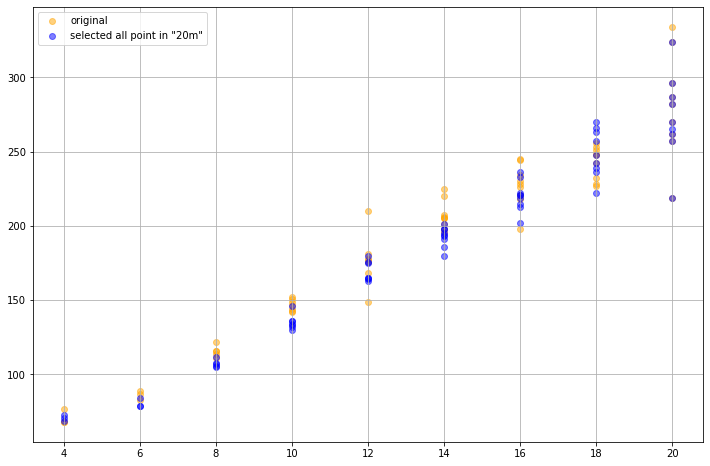

In [260]:
# plot two different data
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=0.5)
plt.scatter(df_selected_depth_regression['variable'].values, df_selected_depth_regression['value'].values, c="blue", alpha=0.5)
plt.legend(['original', 'selected all point in "20m"'])
plt.grid(True)

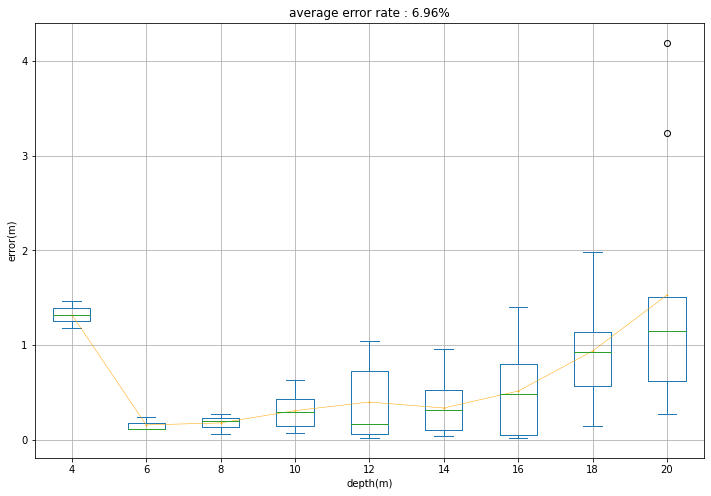

In [261]:
# Selected box plot
boxplot(df_selected_reg_diff_ori, df_selected_error_rate_ori)

In [262]:
df_s_value = df_depth_regression[['value']]
df_s_value.rename(columns={'value':'south'}, inplace=True)

c:\users\seok436\anaconda3\envs\real_meter\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [312]:
df_ewns = pd.DataFrame()
df_ewns['variable'] = df_depth_regression[['variable']]
df_ewns['east'] = df_e_value
df_ewns['west'] = df_w_value
df_ewns['north'] = df_n_value
df_ewns['south'] = df_s_value
df_ewns

,variable,east,west,north,south
0,4,84.0,72.0,77.0,68.0
1,4,64.0,69.0,71.0,77.0
2,4,70.0,84.0,84.0,68.1
9,6,96.0,97.0,92.0,83.0
10,6,82.0,85.0,83.0,87.0
...,...,...,...,...,...
76,20,303.0,316.0,243.0,219.0
77,20,285.0,294.0,303.1,296.0
78,20,266.0,286.0,311.0,287.0
79,20,301.1,271.0,304.0,324.0


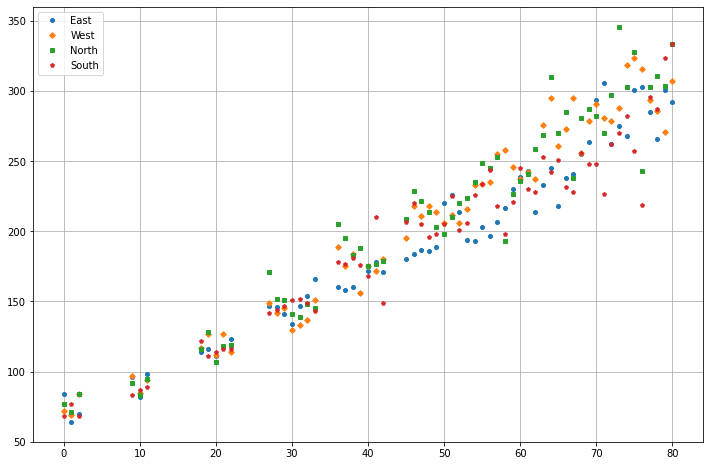

In [355]:
plt.plot(df_ewns['east'], alpha=1, marker='o', linestyle="", markersize=4, linewidth=0.5)
plt.plot(df_ewns['west'], alpha=1, marker='D', linestyle="", markersize=4, linewidth=0.5)
plt.plot(df_ewns['north'], alpha=1, marker='s', linestyle="", markersize=4, linewidth=0.5)
plt.plot(df_ewns['south'], alpha=1, marker='p', linestyle="", markersize=4, linewidth=0.5)
plt.grid(True)
plt.legend(['East', 'West', 'North', 'South'])

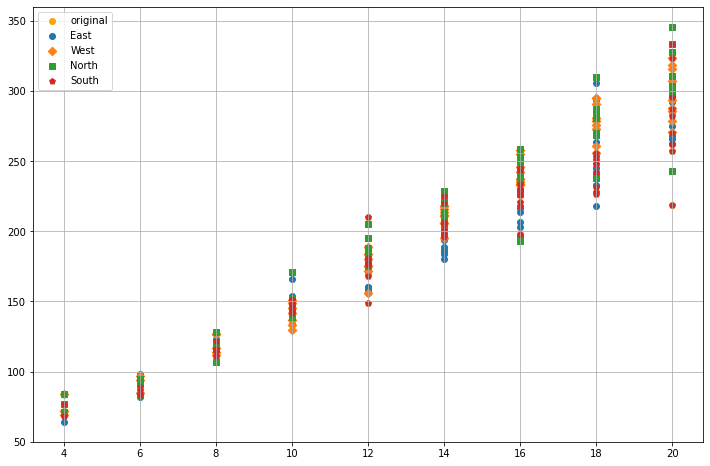

In [352]:
plt.scatter(df_depth_regression['variable'].values, df_depth_regression['value'].values, c="orange", alpha=1)
plt.scatter(df_depth_regression['variable'].values, df_ewns['east'], alpha=1, marker='o')
plt.scatter(df_depth_regression['variable'].values, df_ewns['west'], alpha=1, marker='D')
plt.scatter(df_depth_regression['variable'].values, df_ewns['north'], alpha=1, marker='s')
plt.scatter(df_depth_regression['variable'].values, df_ewns['south'].values, alpha=1, marker='p')
plt.grid(True)
plt.legend(['original', 'East', 'West', 'North', 'South'])

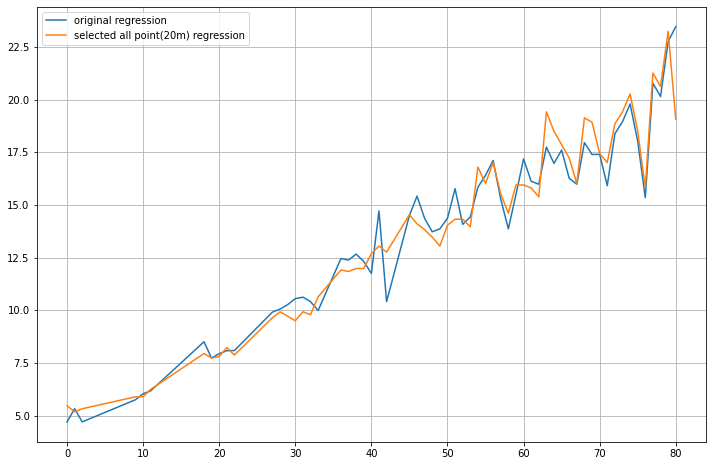

In [416]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df_depth_regression['regression'])
plt.plot(df_selected_depth_regression['regression'])
plt.legend(['original regression', 'selected all point(20m) regression'])
plt.grid(True)

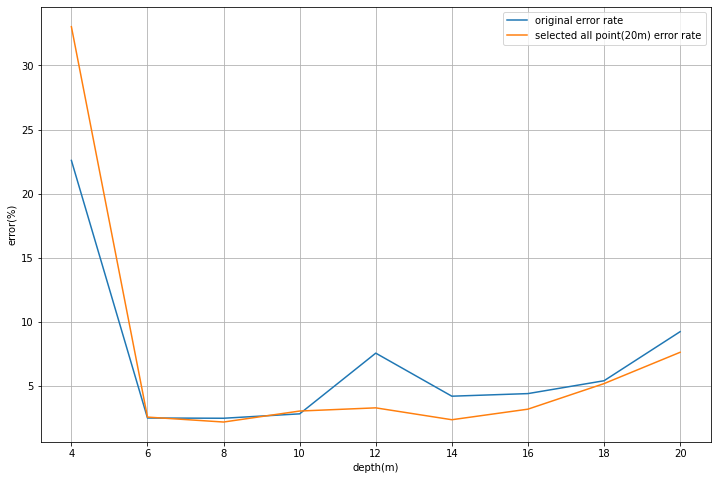

In [433]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(depth_name_list, df_error_rate_ori)
plt.plot(depth_name_list, df_selected_error_rate_ori)
plt.legend(['original error rate', 'selected all point(20m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)

In [418]:
df_selected_depth_regression[:10]

,variable,value,regression,regression_2_point,regression_3_point,regression_4_point,regression_5_point
0,4,73.0,5.462431,4.501517,4.669835,4.856439,5.131041
1,4,69.0,5.179088,3.797776,4.277586,4.520439,4.837183
2,4,71.0,5.320759,4.149646,4.473710,4.688439,4.984112
9,6,79.0,5.887445,5.557128,5.258208,5.360440,5.571826
10,6,79.0,5.887445,5.557128,5.258208,5.360440,5.571826
11,6,84.0,6.241623,6.436805,5.748519,5.780441,5.939148
18,8,108.0,7.941680,10.659252,8.102012,7.796444,7.702291
19,8,105.0,7.729173,10.131446,7.807825,7.544444,7.481898
20,8,106.0,7.800009,10.307381,7.905887,7.628444,7.555363
21,8,112.0,8.225023,11.362993,8.494261,8.132445,7.996148


In [413]:
selected_depth_list[:2]

[[73, 69, 71], [79, 79, 84]]

In [414]:
depth_name_list[:2]

[4, 6]

In [364]:
df_twofive_regression = pd.DataFrame()

In [428]:
for n in range(2, 6):
    temp_regression = pd.DataFrame(selected_depth_list[:n], depth_name_list[:n]).T.melt().dropna(axis=0)
    df_feature, poly_leg = utils.poly_feature(temp_regression['value'].values.reshape(-1, 1), degree)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(df_feature, temp_regression['variable'].values)
    predict_Y = lin_reg_2.predict(poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))
    df_selected_depth_regression['regression_{}_point'.format(n)] = lin_reg_2.predict(
    poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))
df_selected_depth_regression

,variable,value,regression,regression_2_point,regression_3_point,regression_4_point,regression_5_point
0,4,73.0,5.462431,4.501517,4.669835,4.856439,5.131041
1,4,69.0,5.179088,3.797776,4.277586,4.520439,4.837183
2,4,71.0,5.320759,4.149646,4.473710,4.688439,4.984112
9,6,79.0,5.887445,5.557128,5.258208,5.360440,5.571826
10,6,79.0,5.887445,5.557128,5.258208,5.360440,5.571826
...,...,...,...,...,...,...,...
76,20,219.0,15.804441,30.188069,18.986917,17.120461,15.856829
77,20,296.0,21.258789,43.735086,26.537707,23.588473,21.513580
78,20,287.0,20.621268,42.151668,25.655147,22.832472,20.852401
79,20,324.0,23.242189,48.661274,29.283449,25.940477,23.570581


In [431]:
df_selected_2_depth_regression = pd.DataFrame(selected_depth_list[:2], depth_name_list[:2]).T.melt().dropna(axis=0)
df_feature, poly_leg = utils.poly_feature(df_selected_2_depth_regression['value'].values.reshape(-1, 1), degree)
lin_reg_2 = LinearRegression()
df_selected_2_depth_regression

,variable,value
0,4,73
1,4,69
2,4,71
3,6,79
4,6,79
5,6,84


In [409]:
lin_reg_2.fit(df_feature, df_selected_2_depth_regression['variable'].values)

LinearRegression()

In [429]:
predict_Y = lin_reg_2.predict(poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))

array([ 5.13104051,  4.8371833 ,  4.9841119 ,  5.57182633,  5.57182633,
        5.93914785,  7.70229113,  7.48189822,  7.55536252,  7.99614834,
        7.62882682,  9.46543441,  9.75929162,  9.53889871,  9.3185058 ,
        9.75929162,  9.61236301, 10.49393465, 11.81629211, 11.74282781,
       11.88975642, 11.88975642, 12.62439945, 12.99172097, 12.69786376,
       14.53447134, 14.09368552, 13.79982831, 13.43250679, 12.99172097,
       14.02022122, 14.31407843, 14.31407843, 13.94675691, 16.88532905,
       16.07722171, 17.10572196, 15.56297159, 14.60793564, 16.00375741,
       16.00375741, 15.8568288 , 15.41604298, 19.60350827, 18.64847233,
       17.9872936 , 17.32611487, 16.07722171, 19.30965106, 19.08925815,
       17.54650778, 17.10572196, 19.01579384, 19.60350827, 20.48507991,
       18.64847233, 15.8568288 , 21.51358016, 20.85240143, 23.57058065,
       19.23618675])

In [411]:
df_selected_depth_regression['regression_2_point'] = lin_reg_2.predict(
    poly_leg.fit_transform(df_selected_depth_regression['value'].values.reshape(-1, 1)))

In [412]:
df_twofive_regression = df_selected_depth_regression
df_selected_depth_regression

,variable,value,regression,regression_2_point,regression_3_point,regression_4_point,regression_5_point
0,4,73.0,5.462431,4.501517,4.669835,4.856439,5.131041
1,4,69.0,5.179088,3.797776,4.277586,4.520439,4.837183
2,4,71.0,5.320759,4.149646,4.473710,4.688439,4.984112
9,6,79.0,5.887445,5.557128,5.258208,5.360440,5.571826
10,6,79.0,5.887445,5.557128,5.258208,5.360440,5.571826
...,...,...,...,...,...,...,...
76,20,219.0,15.804441,30.188069,18.986917,17.120461,15.856829
77,20,296.0,21.258789,43.735086,26.537707,23.588473,21.513580
78,20,287.0,20.621268,42.151668,25.655147,22.832472,20.852401
79,20,324.0,23.242189,48.661274,29.283449,25.940477,23.570581


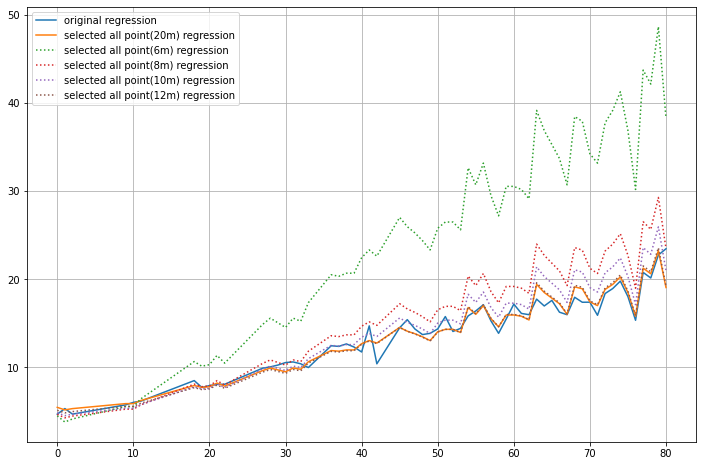

In [415]:
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(df_depth_regression['regression'])
plt.plot(df_selected_depth_regression['regression'])
plt.plot(df_twofive_regression['regression_2_point'], linestyle=":")
plt.plot(df_twofive_regression['regression_3_point'], linestyle=":")
plt.plot(df_twofive_regression['regression_4_point'], linestyle=":")
plt.plot(df_twofive_regression['regression_5_point'], linestyle=":")
plt.legend(['original regression', 'selected all point(20m) regression', 'selected all point(6m) regression', 'selected all point(8m) regression', 'selected all point(10m) regression', 'selected all point(12m) regression'])
plt.grid(True)

In [419]:
# Divided dataframe 2 spot point to 5 spot point
df_error_original = df_selected_depth_regression[['variable', 'value', 'regression']]
df_error_2_point = df_selected_depth_regression[['variable', 'value', 'regression_2_point']]
df_error_3_point = df_selected_depth_regression[['variable', 'value', 'regression_3_point']]
df_error_4_point = df_selected_depth_regression[['variable', 'value', 'regression_4_point']]
df_error_5_point = df_selected_depth_regression[['variable', 'value', 'regression_5_point']]

In [420]:
# Test
df_error_5_point

,variable,value,regression_5_point
0,4,73.0,5.131041
1,4,69.0,4.837183
2,4,71.0,4.984112
9,6,79.0,5.571826
10,6,79.0,5.571826
...,...,...,...
76,20,219.0,15.856829
77,20,296.0,21.513580
78,20,287.0,20.852401
79,20,324.0,23.570581


In [421]:
# Rename for calculating error
df_error_2_point.rename(columns={'regression_2_point':'regression'}, inplace=True)
df_error_3_point.rename(columns={'regression_3_point':'regression'}, inplace=True)
df_error_4_point.rename(columns={'regression_4_point':'regression'}, inplace=True)
df_error_5_point.rename(columns={'regression_5_point':'regression'}, inplace=True)

c:\users\seok436\anaconda3\envs\real_meter\lib\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [422]:
# Rename done
df_error_5_point

,variable,value,regression
0,4,73.0,5.131041
1,4,69.0,4.837183
2,4,71.0,4.984112
9,6,79.0,5.571826
10,6,79.0,5.571826
...,...,...,...
76,20,219.0,15.856829
77,20,296.0,21.513580
78,20,287.0,20.852401
79,20,324.0,23.570581


In [423]:
#Original
df_selected_reg_diff_ori, df_selected_error_rate_ori = cal_error_regression(depth_name_list, df_error_original)

In [424]:
df_selected_2_point_reg_diff, df_selected_2_point_error_rate = cal_error_regression(depth_name_list, df_error_2_point)
df_selected_3_point_reg_diff, df_selected_3_point_error_rate = cal_error_regression(depth_name_list, df_error_3_point)
df_selected_4_point_reg_diff, df_selected_4_point_error_rate = cal_error_regression(depth_name_list, df_error_4_point)
df_selected_5_point_reg_diff, df_selected_5_point_error_rate = cal_error_regression(depth_name_list, df_error_5_point)

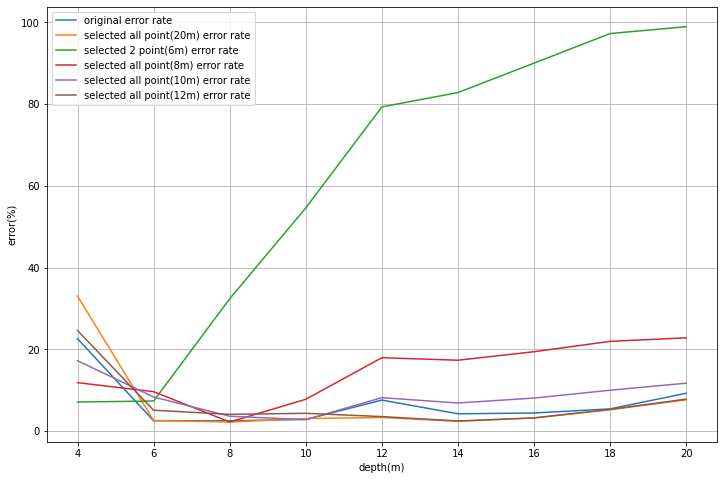

In [426]:
plt.plot(depth_name_list, df_error_rate_ori)
plt.plot(depth_name_list, df_selected_error_rate_ori)
plt.plot(depth_name_list, df_selected_2_point_error_rate)
plt.plot(depth_name_list, df_selected_3_point_error_rate)
plt.plot(depth_name_list, df_selected_4_point_error_rate)
plt.plot(depth_name_list, df_selected_5_point_error_rate)
plt.legend(['original error rate', 'selected all point(20m) error rate', 
            'selected 2 point(6m) error rate', 'selected all point(8m) error rate', 
            'selected all point(10m) error rate', 'selected all point(12m) error rate'])
plt.xlabel('depth(m)')
plt.ylabel('error(%)')
plt.grid(True)